In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = '/content/ign.csv'
data = pd.read_csv(path)
print(data.shape)
data.head()

(18625, 10)


,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [2]:
# print the titles and platfroms of disaster games

score = data['score_phrase'].unique()
print(score)

T_F = (data['score_phrase'] == 'Masterpiece') & (data['platform'] == 'PC')
req_data = data[T_F]
req_data[['release_year','title','platform']]

# Another way of doing it is:
#print(data.loc[data['score_phrase'] == 'Masterpiece', ['title','platform']])

['Amazing' 'Great' 'Good' 'Awful' 'Okay' 'Mediocre' 'Bad' 'Painful'
 'Unbearable' 'Disaster' 'Masterpiece']


,release_year,title,platform
18067,2015,Grand Theft Auto V,PC
18353,2016,The Witness,PC
18417,2016,Undertale,PC
18434,2015,Metal Gear Solid V: The Phantom Pain,PC
18624,2016,Inside,PC


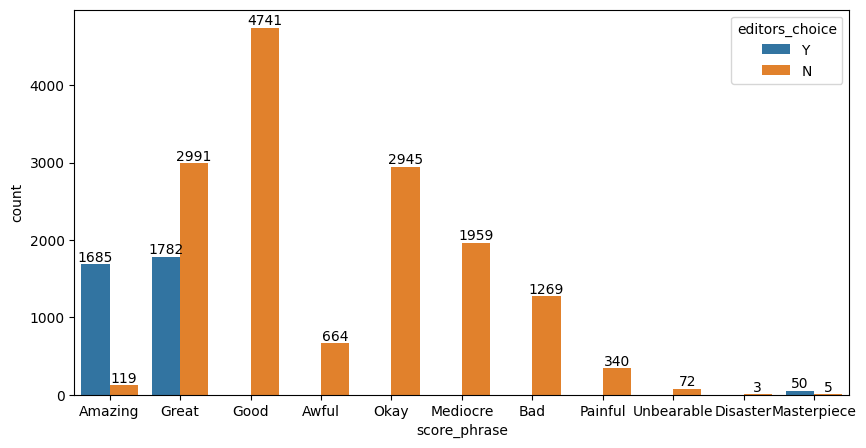

In [3]:
# Display the bar chart of score phrase games
# in terms of each score phrase occurance

plt.figure(figsize=(10,5)) # activate the figure number 1
ax = sns.countplot(data = data, x = 'score_phrase', hue="editors_choice")  #use 'hue' to add new and multi-look-up column for comaprision
# add label to each bar
#print("Container value: ",ax.containers)
for i in (ax.containers):
  ax.bar_label(i)

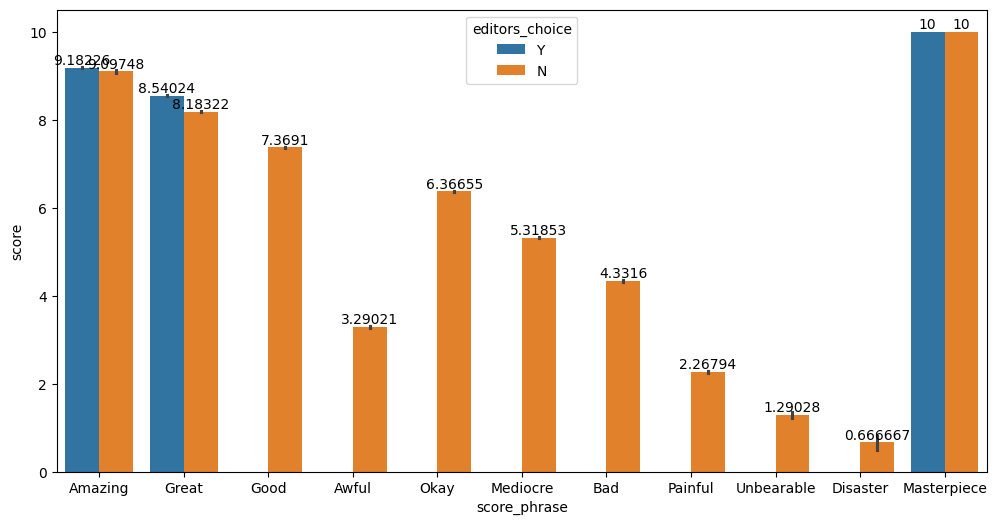

In [4]:
# Use of Barplot

plt.figure(1,figsize=(12,6))
ax = sns.barplot(data=data,x='score_phrase',y='score',hue='editors_choice')
for i in(ax.containers):
  ax.bar_label(i)

In [5]:
# New data

path = '/content/Pokemon.csv'
data = pd.read_csv(path)
print(data.shape)
data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
# Get an idea abiut the data
data.info()
data.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [7]:
# remove/drop column

data.drop(['#'], axis=1, inplace=True)  # Means: Drop # in Y axis, i.e Columns, and make the changes in-place

# If not making the changes in place, save the output in a variable
#temp_data = data.drop(['#'], axis=1)
#temp_data.columns

In [8]:
# Data describe

data.describe().astype(int)
data['Attack'].describe().astype(int)


count    800
mean      79
std       32
min        5
25%       55
50%       75
75%      100
max      190
Name: Attack, dtype: int64

<Figure size 1000x500 with 0 Axes>

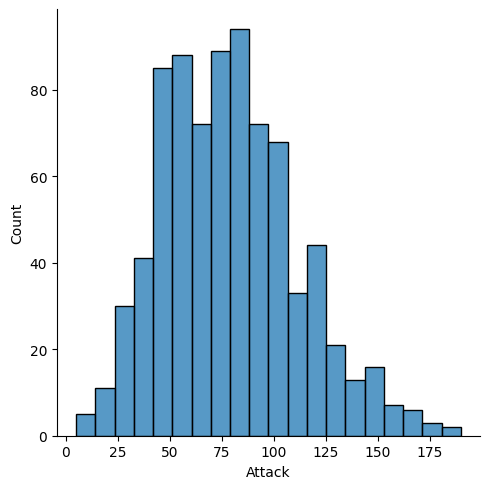

In [9]:
# Distribution plot of a look-up

plt.figure(figsize=(10,5))
sns.displot(data=data, x= 'Attack', kind='hist')

<Axes: >

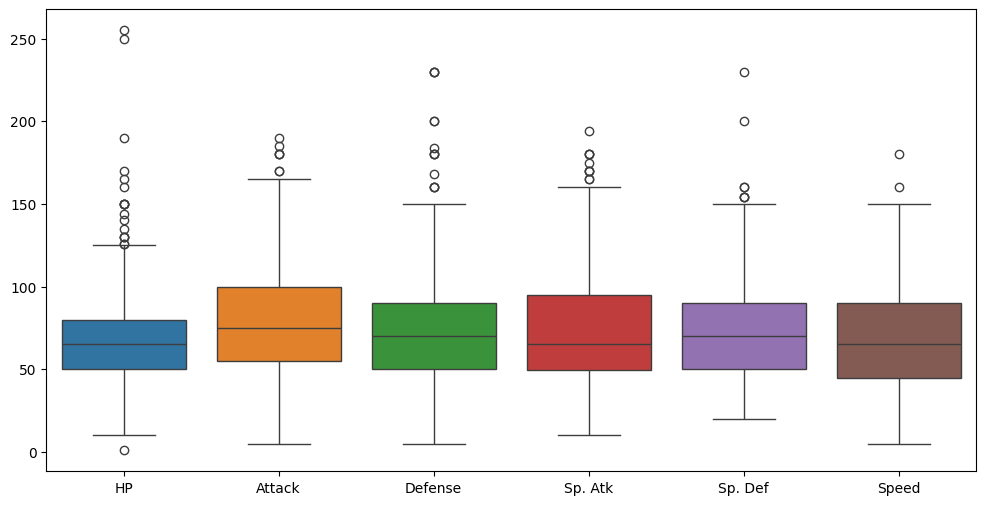

In [10]:
# Box plot is used for checking out-liers
interested_cols = ['HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed']
plt.figure(1,figsize=(12,6))
sns.boxplot(data=data[interested_cols])

<Axes: xlabel='Defense', ylabel='Count'>

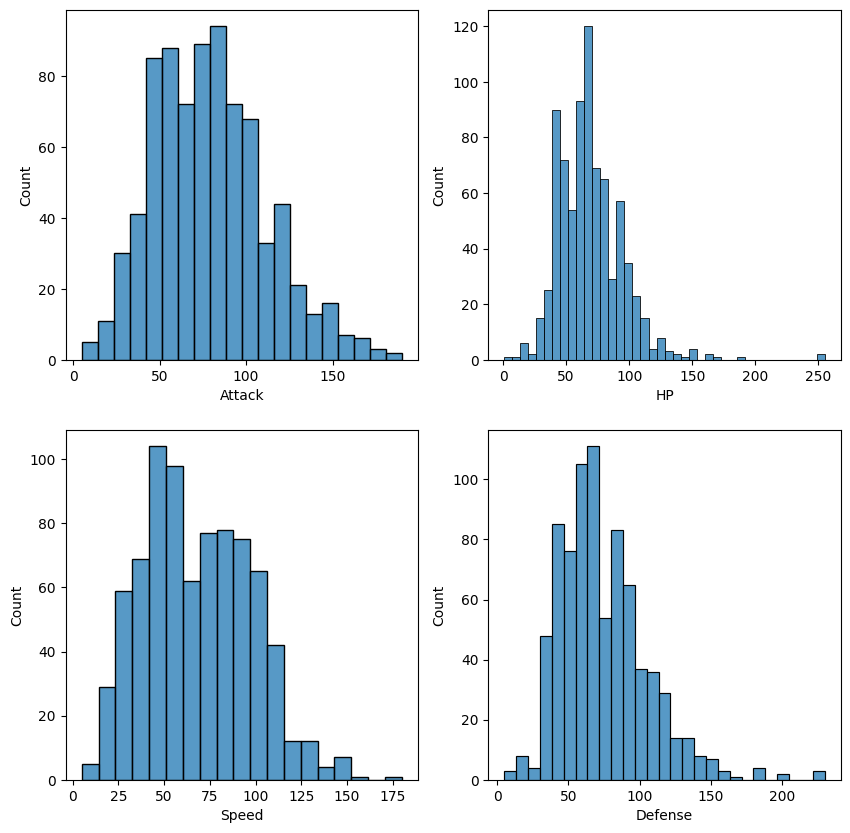

In [11]:
# Figs that has 4 sub plots of Distribution plot of Attack, HP, Speed, Defense

plt.figure(1,figsize=(10,10))

plt.subplot(2,2,1)
sns.histplot(data['Attack'])

plt.subplot(2,2,2)
sns.histplot(data['HP'])

plt.subplot(2,2,3)
sns.histplot(data['Speed'])

plt.subplot(2,2,4)
sns.histplot(data['Defense'])



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Poison'),
  Text(1, 0, 'Flying'),
  Text(2, 0, 'Dragon'),
  Text(3, 0, 'Ground'),
  Text(4, 0, 'Fairy'),
  Text(5, 0, 'Grass'),
  Text(6, 0, 'Fighting'),
  Text(7, 0, 'Psychic'),
  Text(8, 0, 'Steel'),
  Text(9, 0, 'Ice'),
  Text(10, 0, 'Rock'),
  Text(11, 0, 'Dark'),
  Text(12, 0, 'Water'),
  Text(13, 0, 'Electric'),
  Text(14, 0, 'Fire'),
  Text(15, 0, 'Ghost'),
  Text(16, 0, 'Bug'),
  Text(17, 0, 'Normal')])

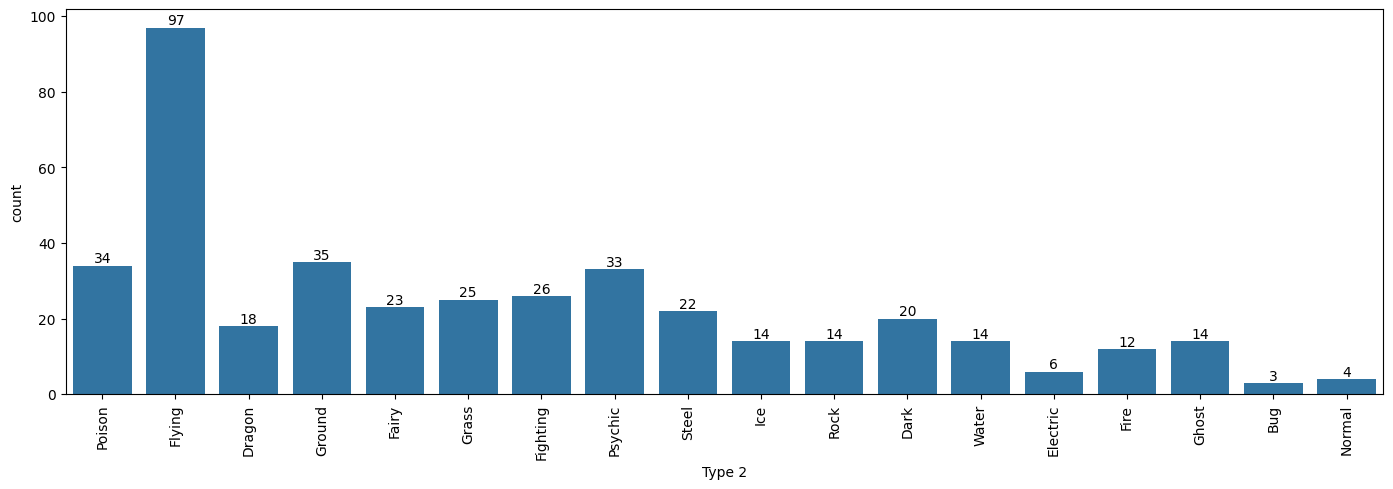

In [12]:
# Display the count plot of type 2 pokemons

plt.figure(1,figsize=(17,5))
ax = sns.countplot(data=data, x='Type 2')
for i in(ax.containers):
  ax.bar_label(i)
plt.xticks(rotation=90)

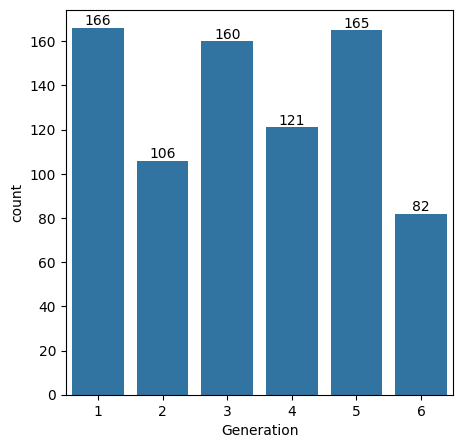

In [13]:
# Display the number of pokemons in each generation
# show it in a visual form

plt.figure(1,figsize=(5,5))
ax = sns.countplot(data=data, x='Generation')
for i in(ax.containers):
  ax.bar_label(i)
#plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Grass'),
  Text(1, 0, 'Fire'),
  Text(2, 0, 'Water'),
  Text(3, 0, 'Bug'),
  Text(4, 0, 'Normal'),
  Text(5, 0, 'Poison'),
  Text(6, 0, 'Electric'),
  Text(7, 0, 'Ground'),
  Text(8, 0, 'Fairy'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Psychic'),
  Text(11, 0, 'Rock'),
  Text(12, 0, 'Ghost'),
  Text(13, 0, 'Ice'),
  Text(14, 0, 'Dragon'),
  Text(15, 0, 'Dark'),
  Text(16, 0, 'Steel'),
  Text(17, 0, 'Flying')])

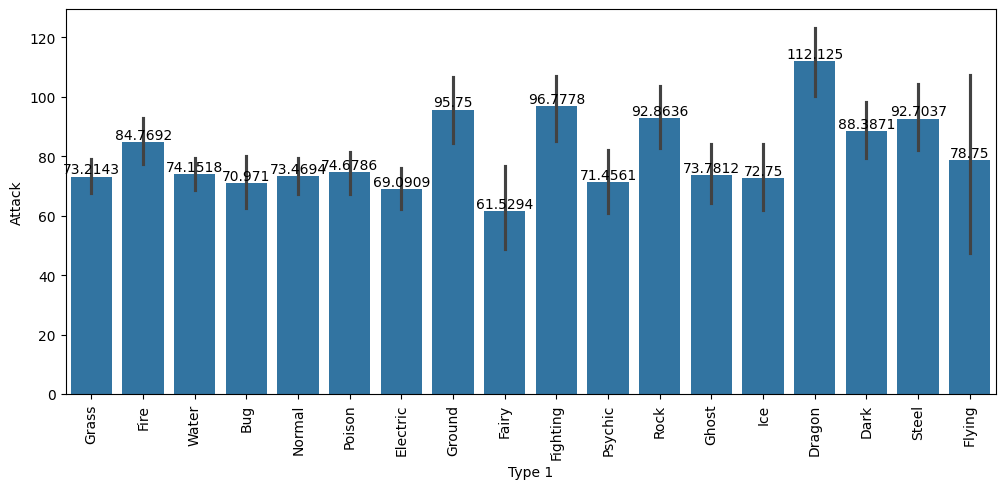

In [14]:
# compare the Type 1 pokemins with respect to Attack capability

plt.figure(1,figsize=(12,5))
ax = sns.barplot(data=data,x='Type 1',y='Attack')
for i in(ax.containers):
  ax.bar_label(i)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Poison'),
  Text(1, 0, 'Flying'),
  Text(2, 0, 'Dragon'),
  Text(3, 0, 'Ground'),
  Text(4, 0, 'Fairy'),
  Text(5, 0, 'Grass'),
  Text(6, 0, 'Fighting'),
  Text(7, 0, 'Psychic'),
  Text(8, 0, 'Steel'),
  Text(9, 0, 'Ice'),
  Text(10, 0, 'Rock'),
  Text(11, 0, 'Dark'),
  Text(12, 0, 'Water'),
  Text(13, 0, 'Electric'),
  Text(14, 0, 'Fire'),
  Text(15, 0, 'Ghost'),
  Text(16, 0, 'Bug'),
  Text(17, 0, 'Normal')])

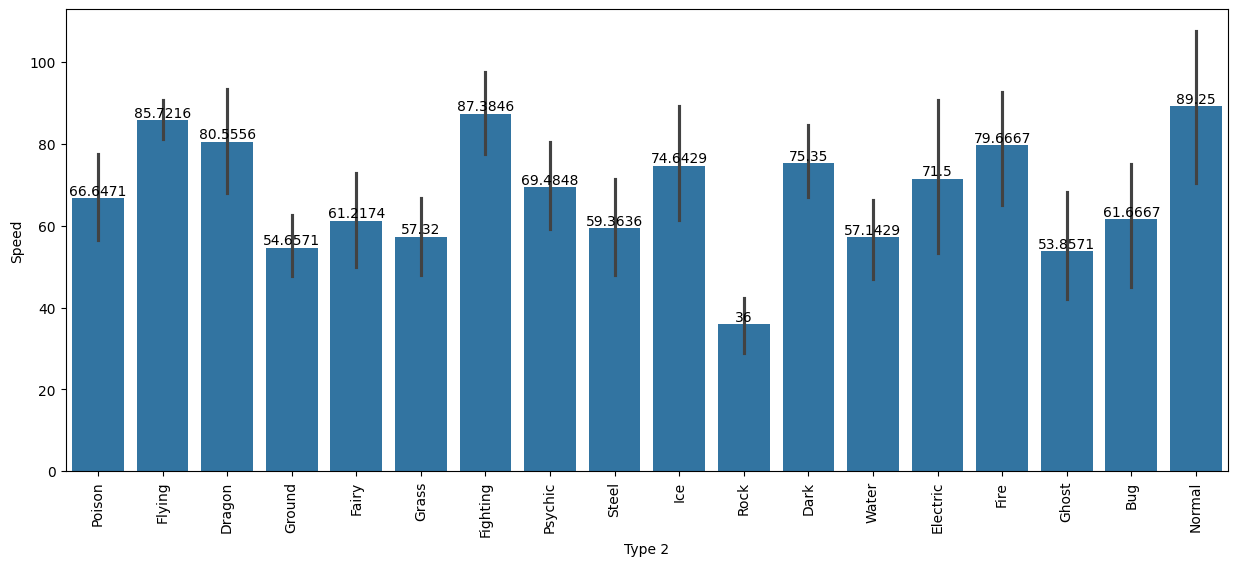

In [15]:
# compare the Type 2 pokemins based upon their speed capability

plt.figure(1,figsize=(15,6))
ax = sns.barplot(data=data, x='Type 2', y='Speed')
for i in(ax.containers):
  ax.bar_label(i)
plt.xticks(rotation=90)

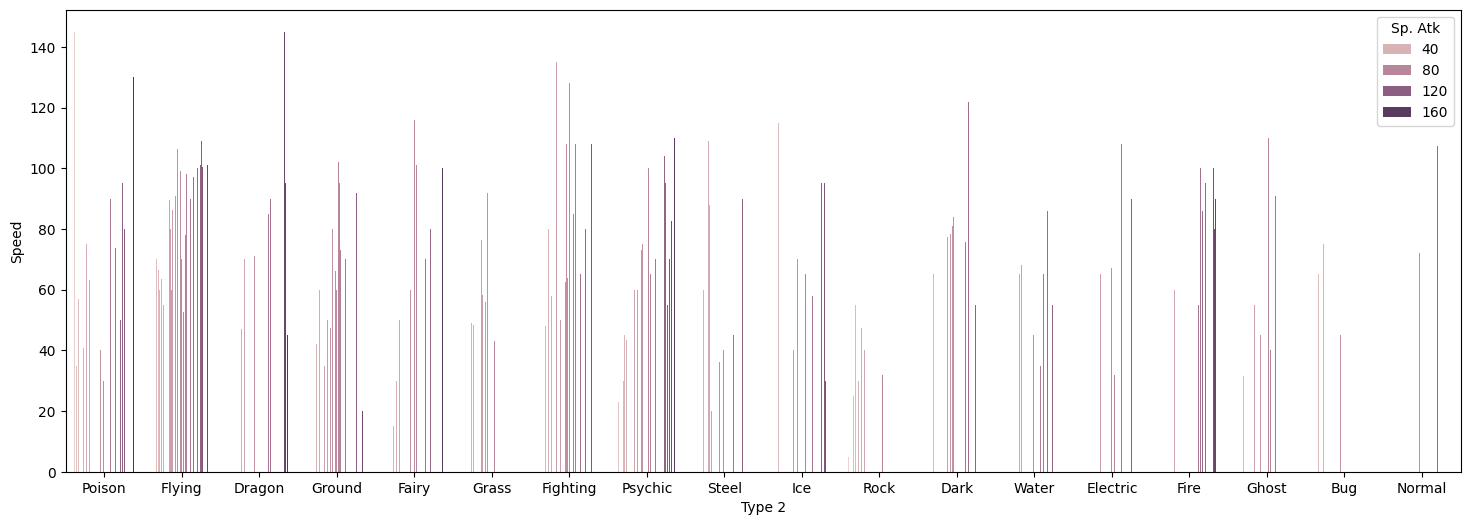

In [16]:
# compare the Type 2 pokemons generation wise based upon their speed capability

plt.figure(1,figsize=(18,6))
ax = sns.barplot(data=data, x='Type 2', y='Speed', hue="Sp. Atk", errorbar=None) # Use hue='Legendary' for better visuals
#for i in(ax.containers):
#  ax.bar_label(i)
#plt.xticks(rotation=90)

In [17]:
# seperate out the legendary pokemons and non-legendary pokemons
# then perform the analysis on legendary pokemons and non-legendary pokemons seperately

legen_TF = data['Legendary'] == True
non_legen_TF = data['Legendary'] == False

legen_data = data[legen_TF]
non_legen_data = data[non_legen_TF]

print(legen_data.shape)
print(non_legen_data.shape)

(65, 12)
(735, 12)


Text(0.5, 1.0, 'Non Legendary Pokemon Defense Analysis')

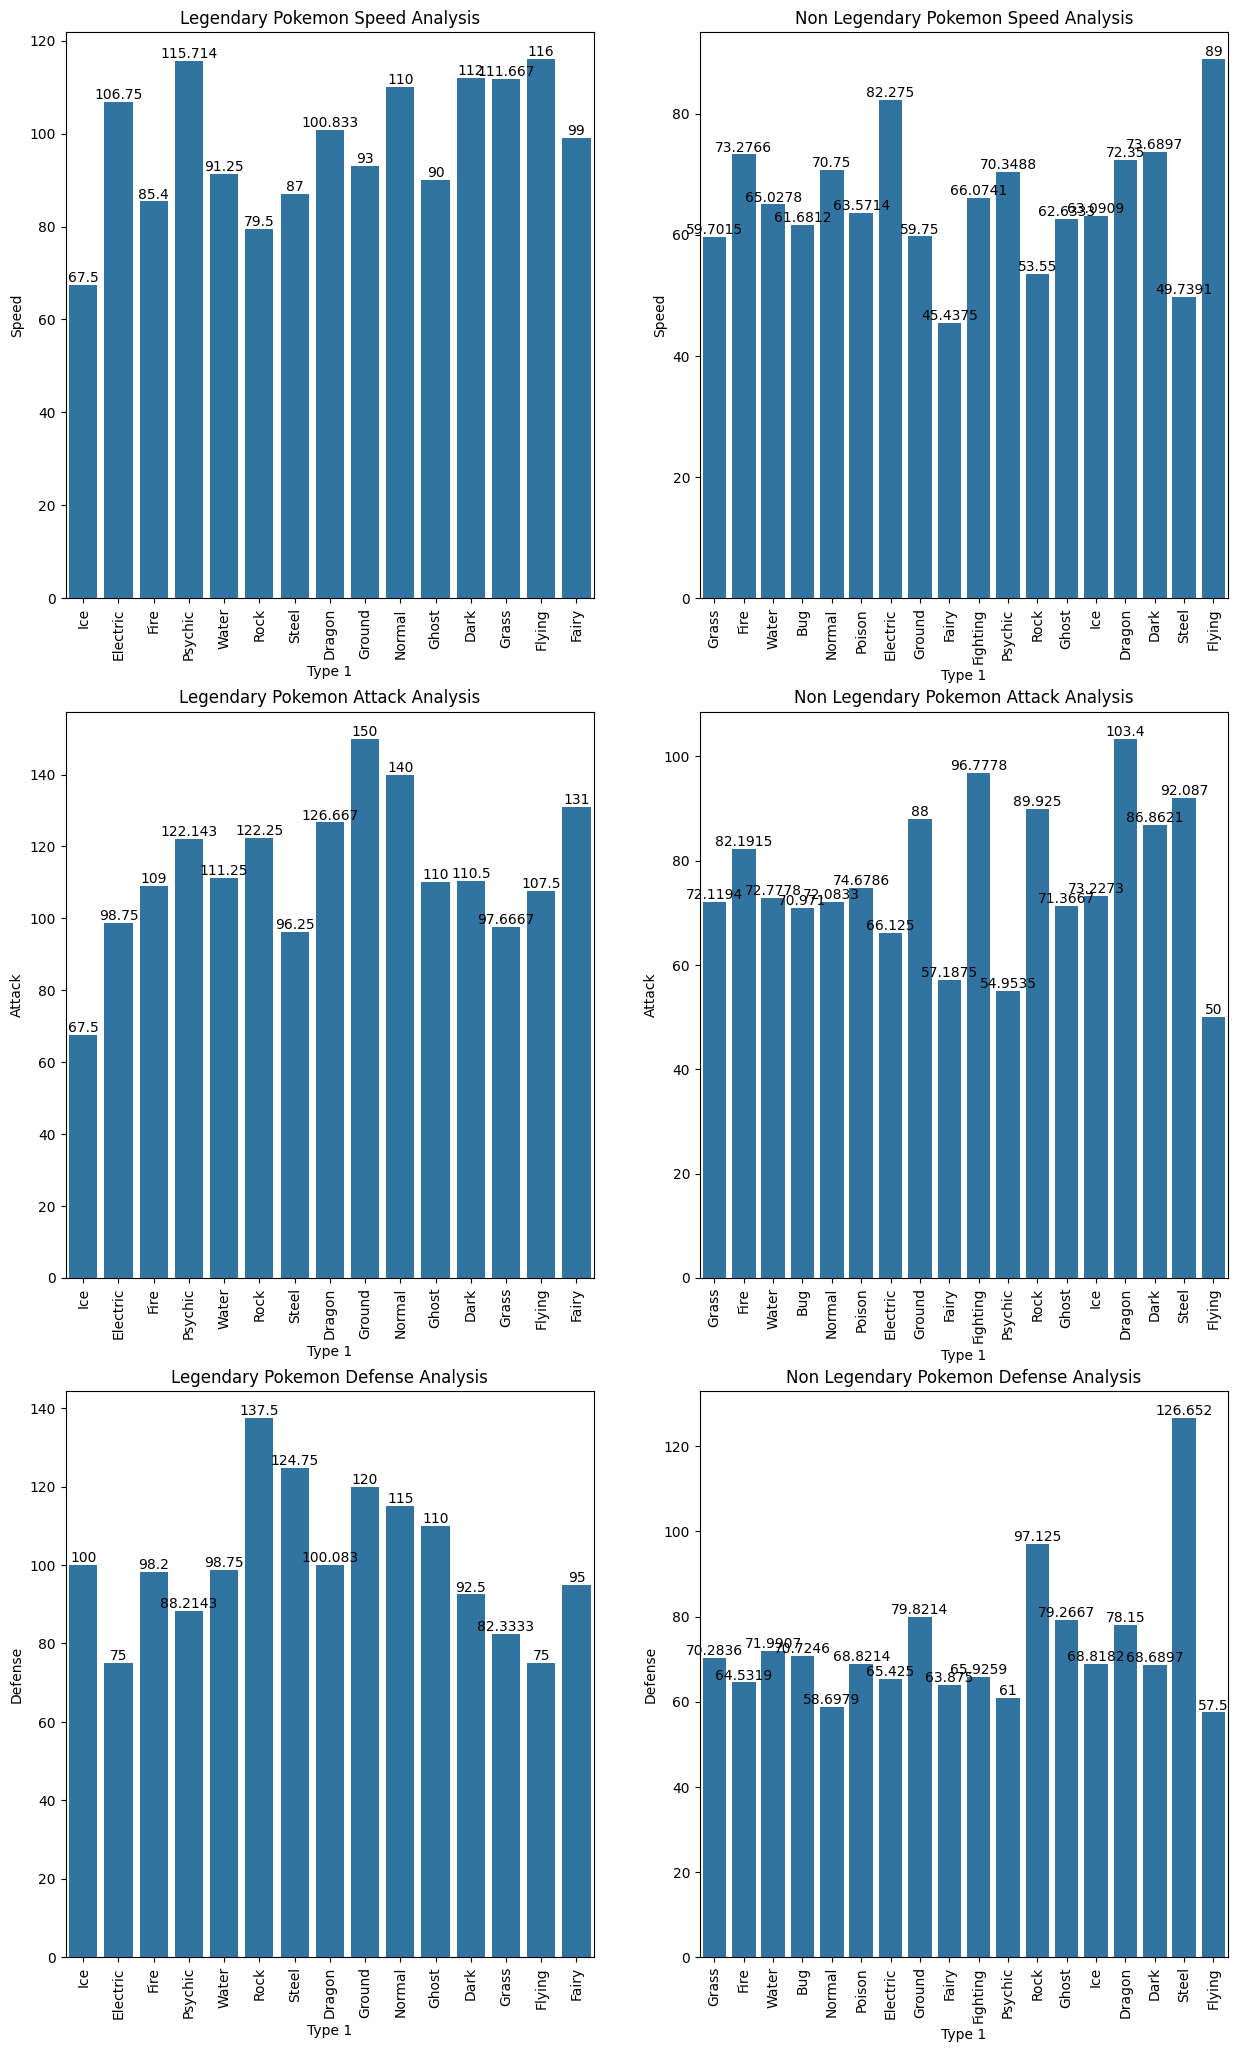

In [18]:


# compare the attack, defense and speed w.r.t their types


# Type 1:-
plt.figure(1,figsize=(15,25))
# Type 1 -- Speed

plt.subplot(3,2,1)
ax = sns.barplot(data=legen_data, x='Type 1', y='Speed',errorbar=None)
for i in (ax.containers):
  ax.bar_label(i)
plt.xticks(rotation=90)
plt.title('Legendary Pokemon Speed Analysis')

plt.subplot(3,2,2)
ax = sns.barplot(data=non_legen_data, x='Type 1', y='Speed',errorbar=None)
for i in (ax.containers):
  ax.bar_label(i)
plt.xticks(rotation=90)
plt.title('Non Legendary Pokemon Speed Analysis')


# Type 1 -- Attack
#plt.figure(2,figsize=(9,3))
plt.subplot(3,2,3)
ax = sns.barplot(data=legen_data, x='Type 1', y='Attack',errorbar=None)
for i in (ax.containers):
  ax.bar_label(i)
plt.xticks(rotation=90)
plt.title('Legendary Pokemon Attack Analysis')

plt.subplot(3,2,4)
ax = sns.barplot(data=non_legen_data, x='Type 1', y='Attack',errorbar=None)
for i in (ax.containers):
  ax.bar_label(i)
plt.xticks(rotation=90)
plt.title('Non Legendary Pokemon Attack Analysis')


# Type 1 -- Defense
#plt.figure(3,figsize=(9,3))
plt.subplot(3,2,5)
ax = sns.barplot(data=legen_data, x='Type 1', y='Defense',errorbar=None)
for i in (ax.containers):
  ax.bar_label(i)
plt.xticks(rotation=90)
plt.title('Legendary Pokemon Defense Analysis')

plt.subplot(3,2,6)
ax = sns.barplot(data=non_legen_data, x='Type 1', y='Defense',errorbar=None)
for i in (ax.containers):
  ax.bar_label(i)
plt.xticks(rotation=90)
plt.title('Non Legendary Pokemon Defense Analysis')




Text(0.5, 1.0, 'Non Legendary Pokemon Defense Analysis')

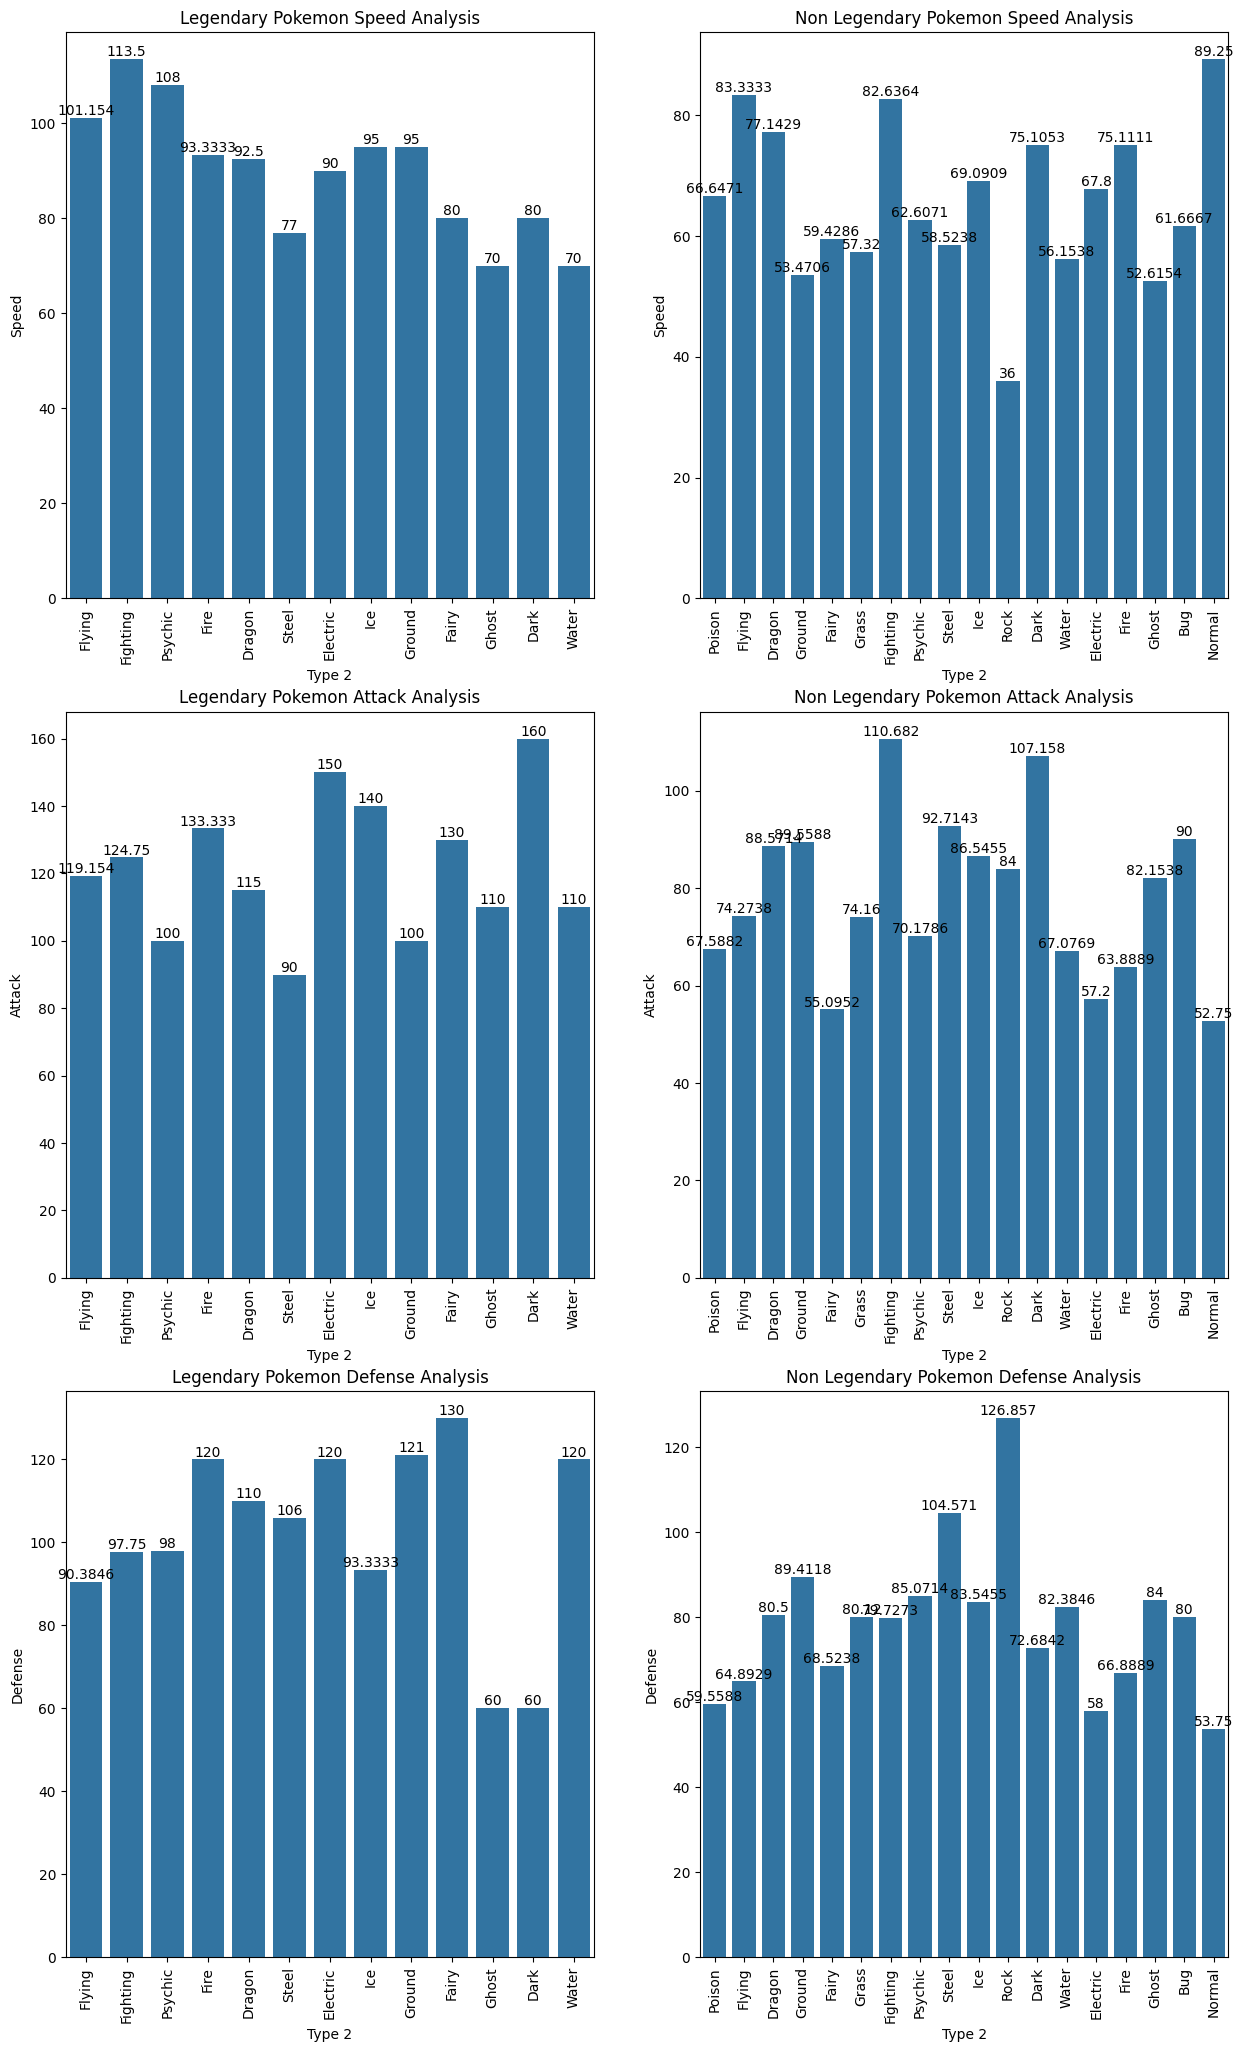

In [19]:
# Type 2:-
plt.figure(1,figsize=(15,25))
# Type 2 -- Speed

plt.subplot(3,2,1)
ax = sns.barplot(data=legen_data, x='Type 2', y='Speed',errorbar=None)
for i in (ax.containers):
  ax.bar_label(i)
plt.xticks(rotation=90)
plt.title('Legendary Pokemon Speed Analysis')

plt.subplot(3,2,2)
ax = sns.barplot(data=non_legen_data, x='Type 2', y='Speed',errorbar=None)
for i in (ax.containers):
  ax.bar_label(i)
plt.xticks(rotation=90)
plt.title('Non Legendary Pokemon Speed Analysis')


# Type 1 -- Attack
#plt.figure(2,figsize=(9,3))
plt.subplot(3,2,3)
ax = sns.barplot(data=legen_data, x='Type 2', y='Attack',errorbar=None)
for i in (ax.containers):
  ax.bar_label(i)
plt.xticks(rotation=90)
plt.title('Legendary Pokemon Attack Analysis')

plt.subplot(3,2,4)
ax = sns.barplot(data=non_legen_data, x='Type 2', y='Attack',errorbar=None)
for i in (ax.containers):
  ax.bar_label(i)
plt.xticks(rotation=90)
plt.title('Non Legendary Pokemon Attack Analysis')


# Type 1 -- Defense
#plt.figure(3,figsize=(9,3))
plt.subplot(3,2,5)
ax = sns.barplot(data=legen_data, x='Type 2', y='Defense',errorbar=None)
for i in (ax.containers):
  ax.bar_label(i)
plt.xticks(rotation=90)
plt.title('Legendary Pokemon Defense Analysis')

plt.subplot(3,2,6)
ax = sns.barplot(data=non_legen_data, x='Type 2', y='Defense',errorbar=None)
for i in (ax.containers):
  ax.bar_label(i)
plt.xticks(rotation=90)
plt.title('Non Legendary Pokemon Defense Analysis')



Text(0.5, 1.0, 'Non Legendary Pokemon')

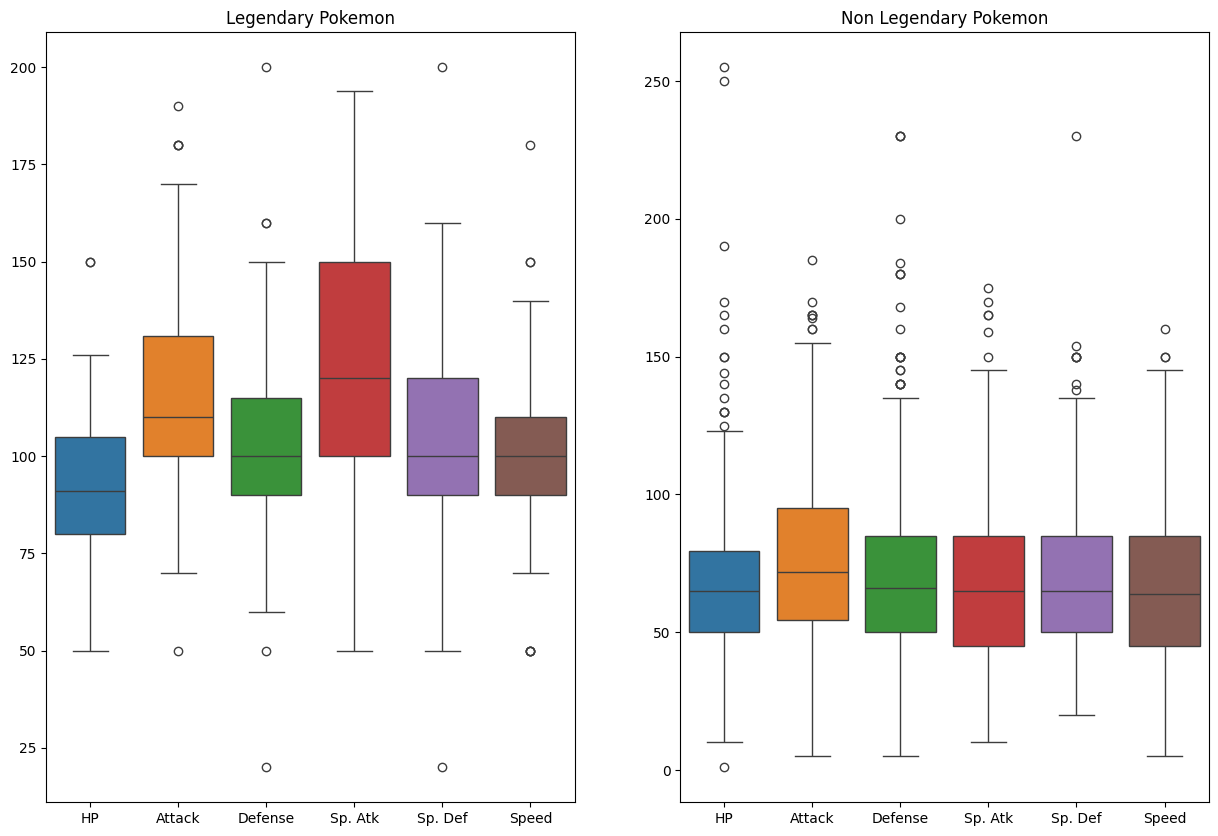

In [20]:
# compare their total strength w.r.t generations

col = ['HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed']
plt.figure(1,figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(data=legen_data[col])
plt.title('Legendary Pokemon')

plt.subplot(1,2,2)
sns.boxplot(data=non_legen_data[col])
plt.title('Non Legendary Pokemon')